## Libraries

This post relies on the [PyWaffle library](https://github.com/gyli/PyWaffle), that is definitely the best way to create a waffle chart with Python.

The very first thing to do is to install the library:

`pip install pywaffle`

Then, we just have to import the following libraries:
- [pandas](https://python-graph-gallery.com/pandas/) for creating a dataframe with our data
- [matplotlib](https://python-graph-gallery.com/matplotlib/) for customizing the chart
- `pywaffle` for the **waffle** figure

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

## Dataset

We create a simple dataset with the **number of cars produced**, broken down **by year and car type** (`car`, `truck` or `motorcycle`). Also, we define the index of this dataset using the `set_index()` function and specify that **each row** corresponds to a type of car.

In [2]:
data = {
    2018: [3032, 2892, 804],
    2019: [4537, 3379, 1096],
    2020: [8932, 3879, 896],
    2021: [22147, 6678, 2156],
    2022: [32384, 13354, 5245]
}

df = pd.DataFrame(data,
                  index=['car', 'truck', 'motorcycle'])

## Waffle bar chart

Since there is **no pre-defined method** for waffle bar chart, we will create a *1 x n* figure, where n is the number of bar we want (**1 row and n cols**). In our case, it's one bar for each year (= 5).

We will **iterate over each axe** and add the waffle chart of the corresponding year. The waffle chart is made with the `make_waffle()` function

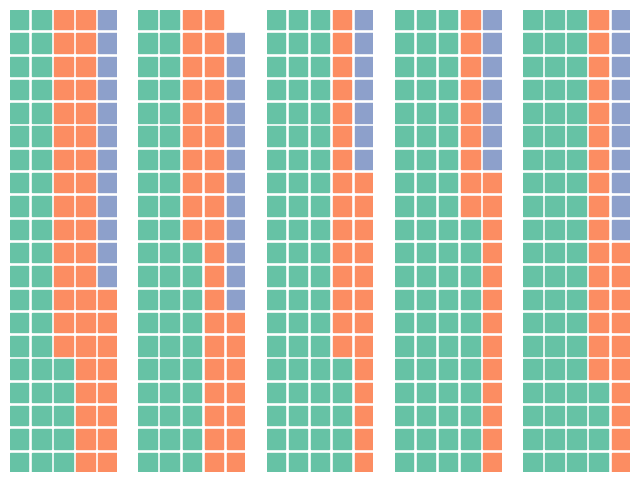

In [3]:
number_of_bars = len(df.columns) # one bar per year

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name] # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
    )

plt.show()

## Stack vertically

By default, the bars are **stacked horizontally** (from left to right). But in the context of a waffle bar chart, it might be **more relevant** to stack vertically.

For this, we have to add `vertical=True` in the `make_waffle()` function:

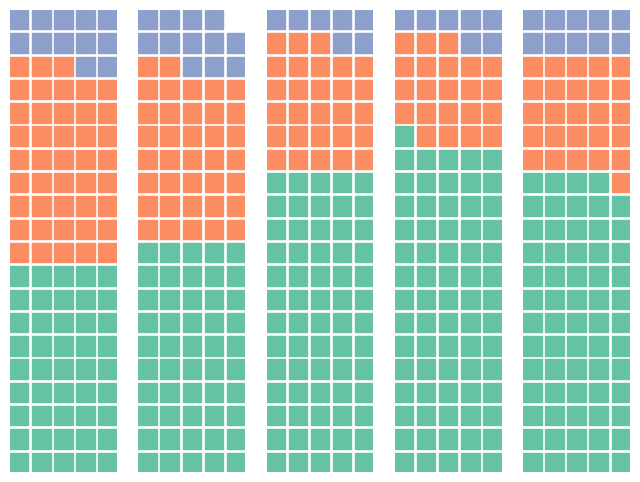

In [4]:
number_of_bars = len(df.columns) # one bar per year

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name] # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        vertical=True,
    )

plt.show()

## Custom colors and style

The previous graphs lack the comments and legends needed for easy interpretation.

To this end, we're going to add :
- a **legend**: it is created by **iterating** through a list of colors and generating graphical elements (`Patches`) with corresponding labels
- a **title** via the `subtitle()` function
- change the **colors** with the `colors` argument
- change the **shapes** with the `icons` argument

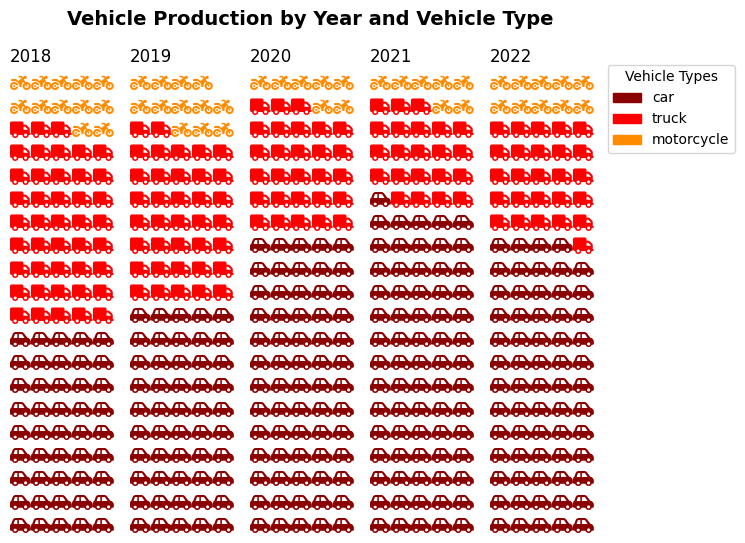

In [5]:
number_of_bars = len(df.columns) # one bar per year
colors = ["darkred", "red", "darkorange"]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]/1000 # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        icons=['car-side', 'truck', 'motorcycle'],
        font_size=12, # size of each point
        icon_legend=True,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )
    
# Add a title
fig.suptitle('Vehicle Production by Year and Vehicle Type',
             fontsize=14, fontweight='bold')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
fig.legend(handles=legend_elements,
           loc="upper right",
           title="Vehicle Types",
           bbox_to_anchor=(1.04, 0.9))

plt.subplots_adjust(right=0.85)
plt.show()

## Going further

This post explains how to create a [waffle bar chart](https://python-graph-gallery.com/waffle-chart/).

For more examples of **how to create or customize** your waffle chart, see the [waffle section](https://python-graph-gallery.com/waffle-chart/). You may also be interested in how to create a [waffle chart with grouping](https://python-graph-gallery.com/541-waffle-chart-with-additionnal-grouping/).